In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\bhanu teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bhanu teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\bhanu teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
telescope_data =  pd.read_csv('telescope_data.csv')
telescope_data = telescope_data.drop("class", axis=1)
telescope_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


### 1. Mean vector

In [3]:
mean_vector = np.mean(telescope_data, axis=0)
print("Mean vector: ")
print(mean_vector)

Mean vector: 
fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


### 2. Covariance  using innerproduct

In [4]:
centered_data = telescope_data - mean_vector
covariance_matrix = pd.DataFrame(np.cov(centered_data.T))

covariance_matrix

,0,1,2,3,4,5,6,7,8,9
0,1766.710603,731.278208,13.877761,-4.795976,-2.754310,-338.521963,-317.091670,134.197204,-42.699515,1088.506735
1,731.278208,511.310810,7.031488,-2.230835,-1.292486,254.802711,-419.194118,76.420843,34.672026,456.444068
2,13.877761,7.031488,0.226271,-0.067494,-0.038788,0.460739,1.608942,0.648693,-2.846388,17.400684
3,-4.795976,-2.230835,-0.067494,0.029483,0.017875,0.329190,-0.884361,-0.393915,1.319799,-4.615745
4,-2.754310,-1.292486,-0.038788,0.017875,0.011461,0.154446,-0.605827,-0.209961,0.710753,-2.523787
5,-338.521963,254.802711,0.460739,0.329190,0.154446,3899.838668,-263.597250,15.496390,10.170821,-659.973549
6,-317.091670,-419.194118,1.608942,-0.884361,-0.605827,-263.597250,2851.490243,124.168867,-277.106455,633.900249
7,134.197204,76.420843,0.648693,-0.393915,-0.209961,15.496390,124.168867,463.939383,-33.519699,165.463602
8,-42.699515,34.672026,-2.846388,1.319799,0.710753,10.170821,-277.106455,-33.519699,825.699936,-479.369739
9,1088.506735,456.444068,17.400684,-4.615745,-2.523787,-659.973549,633.900249,165.463602,-479.369739,6361.467591


### 3. Covariance using Outer Product

In [5]:
centered_data = telescope_data - mean_vector
covariance_matrix = pd.DataFrame(np.outer(centered_data, centered_data.T) / (telescope_data.shape[0] - 1))
covariance_matrix

,0,1,2,3,4,5,6,7,8,9,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,4.169790,3.764497,-15.071163,4.888788,-2.521247,0.873718,1.361358,4.459584,-5.567406,1.575765,...,1.490429,6.590833,-9.399243,-5.764298,-1.253243,-17.987803,4.956146,22.897112,-16.440964,-12.201018
1,1.157027,1.044567,-4.181923,1.356533,-0.699592,0.242438,0.377747,1.237438,-1.544835,0.437241,...,0.413562,1.828814,-2.608087,-1.599469,-0.347748,-4.991228,1.375224,6.353455,-4.562013,-3.385520
2,0.033028,0.029818,-0.119375,0.038723,-0.019970,0.006921,0.010783,0.035323,-0.044098,0.012481,...,0.011805,0.052205,-0.074449,-0.045658,-0.009927,-0.142477,0.039257,0.181363,-0.130225,-0.096642
3,-0.004102,-0.003703,0.014827,-0.004809,0.002480,-0.000860,-0.001339,-0.004387,0.005477,-0.001550,...,-0.001466,-0.006484,0.009247,0.005671,0.001233,0.017696,-0.004876,-0.022526,0.016174,0.012003
4,0.001333,0.001204,-0.004819,0.001563,-0.000806,0.000279,0.000435,0.001426,-0.001780,0.000504,...,0.000477,0.002108,-0.003006,-0.001843,-0.000401,-0.005752,0.001585,0.007322,-0.005257,-0.003901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,10.451896,9.435998,-37.777018,12.254120,-6.319698,2.190041,3.412347,11.178287,-13.955126,3.949775,...,3.735874,16.520425,-23.559918,-14.448653,-3.141350,-45.087798,12.422958,57.393356,-41.210528,-30.582782
2006,22.494283,20.307896,-81.302661,26.372980,-13.601080,4.713347,7.343959,24.057601,-30.033839,8.500597,...,8.040245,35.554805,-50.705009,-31.095995,-6.760727,-97.036719,26.736350,123.520404,-88.692166,-65.819424
2007,10.285090,9.285405,-37.174120,12.058551,-6.218839,2.155090,3.357888,10.999888,-13.732411,3.886739,...,3.676252,16.256769,-23.183916,-14.218062,-3.091216,-44.368224,12.224695,56.477393,-40.552833,-30.094699
2008,-8.196635,-7.399943,29.625671,-9.609983,4.956063,-1.717485,-2.676047,-8.766289,10.943955,-3.097511,...,-2.929765,-12.955726,18.476270,11.330991,2.463524,35.358965,-9.742391,-45.009288,32.318314,23.983773


### 4. EigenValues and EigenVectors of cov-matrix of attribute 7 and 8

In [6]:
data = telescope_data[["fM3Long", "fM3Trans"]]
cov_matrix = np.cov(data, rowvar = False)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [7]:
eig_values

array([2857.93049538,  457.49913084])

In [8]:
eig_vectors

array([[ 0.99865762, -0.05179726],
       [ 0.05179726,  0.99865762]])

### 5. Cov - Matrix between attributes 3, 7 and 8

In [9]:
data = telescope_data[["fSize", "fM3Long", "fM3Trans"]]
cov_matrix = np.cov(data, rowvar = False)
cov_matrix

array([[2.26271192e-01, 1.60894156e+00, 6.48693246e-01],
       [1.60894156e+00, 2.85149024e+03, 1.24168867e+02],
       [6.48693246e-01, 1.24168867e+02, 4.63939383e+02]])

### 6. Cov-Matrix of categorical attribute (attribute 2 is categorised)

In [10]:
data = telescope_data["fWidth"]

first_quartile = np.percentile(data, 25)
median = np.percentile(data, 50)
third_quartile = np.percentile(data, 75)

categories = pd.cut(data, bins=[-np.inf, first_quartile, median, third_quartile, np.inf], labels=['Q1', 'Q2', 'Q3', 'Q4'])

one_hot_encoded_categories = []
for category in categories:
    if category == 'Q1':
        one_hot_encoded_categories.append(1)
    elif category == 'Q2':
        one_hot_encoded_categories.append(2)
    elif category == 'Q3':
        one_hot_encoded_categories.append(3)
    else:
        one_hot_encoded_categories.append(4)

covariance_matrix = np.cov(one_hot_encoded_categories)

print("Covariance Matrix of the new categorical attribute:")
print(covariance_matrix)

Covariance Matrix of the new categorical attribute:
1.2611940298507465


### 7. Emperical CDFs of attributes 4,6 and 8

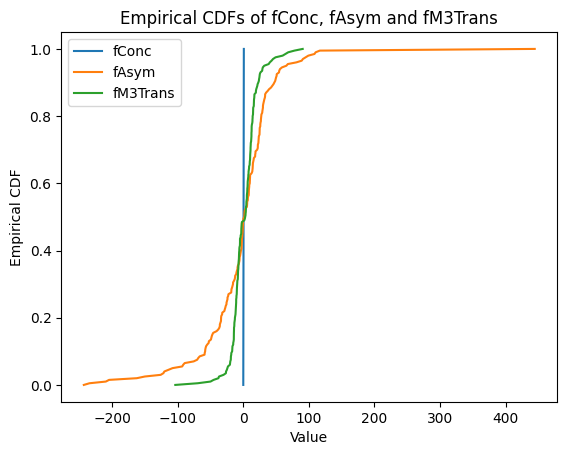

In [11]:
data = [telescope_data["fConc"], telescope_data["fAsym"], telescope_data["fM3Trans"]]

# Create labels for attributes
labels = ["fConc", "fAsym", "fM3Trans"]

# Plot empirical CDFs
for i, attribute in enumerate(data):
    sorted_data = np.sort(attribute)
    y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    plt.plot(sorted_data, y, label=labels[i])

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDFs of fConc, fAsym and fM3Trans")
plt.legend()

### 8. Covariance matrix of attribute 8

In [12]:
data = telescope_data["fDist"]
covariance_matrix = np.cov(data, rowvar=False)
covariance_matrix

array(6361.46759083)

### 9. Cosine similarity between "fLength" and "fWidth" and their scatter plot

In [13]:
data1 = centered_data["fLength"]
data2 = centered_data["fWidth"]

cosine_similarity = np.dot(data1, data2) / (
    np.linalg.norm(data1) * np.linalg.norm(data2)
)

cosine_similarity

0.7694093096665072

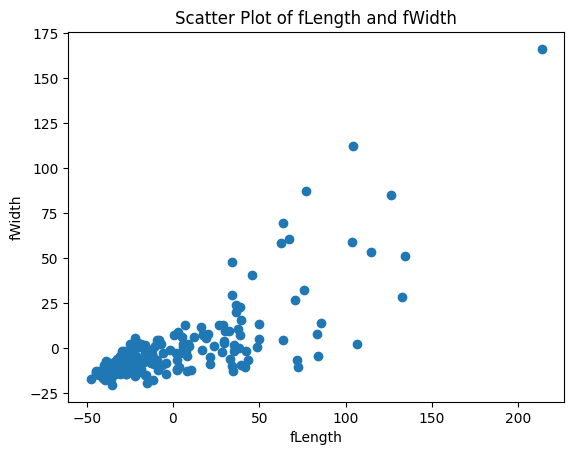

In [14]:
plt.scatter(data1, data2)
plt.xlabel("fLength")
plt.ylabel("fWidth")
plt.title("Scatter Plot of fLength and fWidth")

plt.show()

### 10. Probability Distribution Function of Attribute 1 (standardized)

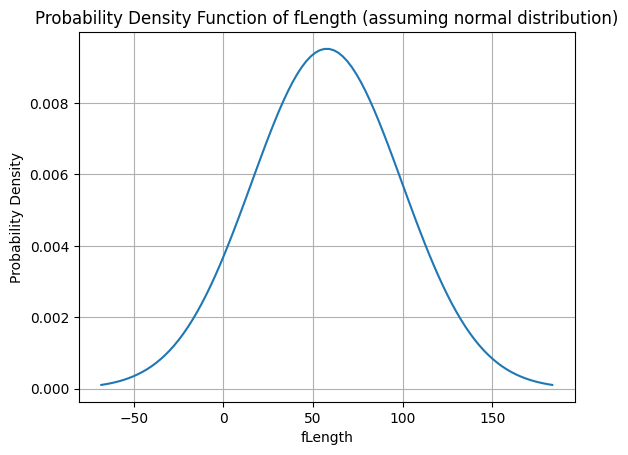

In [15]:
data = telescope_data['fLength']

mean = np.mean(data)
std = np.std(data)

x = np.linspace(mean - 3*std, mean + 3*std, 100)

pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))

plt.plot(x, pdf)
plt.xlabel("fLength")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of fLength (assuming normal distribution)")

plt.grid(True)
plt.show()

### 11. Attributes with Largest and Smallest variances

In [16]:
variances = np.var(telescope_data, axis=0)

max_variance_index = np.argmax(variances)
min_variance_index = np.argmin(variances)

print(f"Attribute {max_variance_index + 1} has the largest variance: {variances[max_variance_index]:.2f}")
print(f"Attribute {min_variance_index + 1} has the smallest variance: {variances[min_variance_index]:.2f}")

Attribute 10 has the largest variance: 6329.82
Attribute 5 has the smallest variance: 0.01


### 12. Pair of attributes with largest and smallest covariances

In [23]:
largest_value = float("-inf")
largest_pair = None
smallest_value = float("inf")
smallest_pair = None

covariance_matrix = telescope_data.cov()

# Loop through upper triangular part (excluding diagonal)
for i in range(covariance_matrix.shape[0]):
    for j in range(i + 1, covariance_matrix.shape[1]):
        current_value = covariance_matrix.iloc[i, j]
        if current_value > largest_value:
            largest_value = current_value
            largest_pair = (i, j)
        elif current_value < smallest_value:
            smallest_value = current_value
            smallest_pair = (i, j)


print(f"Pair with largest covariance:")
print(f"- Attributes: {covariance_matrix.columns[largest_pair[0]]} and {covariance_matrix.columns[largest_pair[1]]}")
print(f"- Value: {largest_value:.2f}")


print(f"Pair with smallest covariance:")
print(f"- Attributes: {covariance_matrix.columns[smallest_pair[0]]} and {covariance_matrix.columns[smallest_pair[1]]}")
print(f"- Value: {smallest_value:.2f}")

Pair with largest covariance:
- Attributes: fLength and fDist
- Value: 1088.51
Pair with smallest covariance:
- Attributes: fAsym and fDist
- Value: -659.97


### 13. Plotting attribute 2 vs attribute 5, and marking each point as a circle

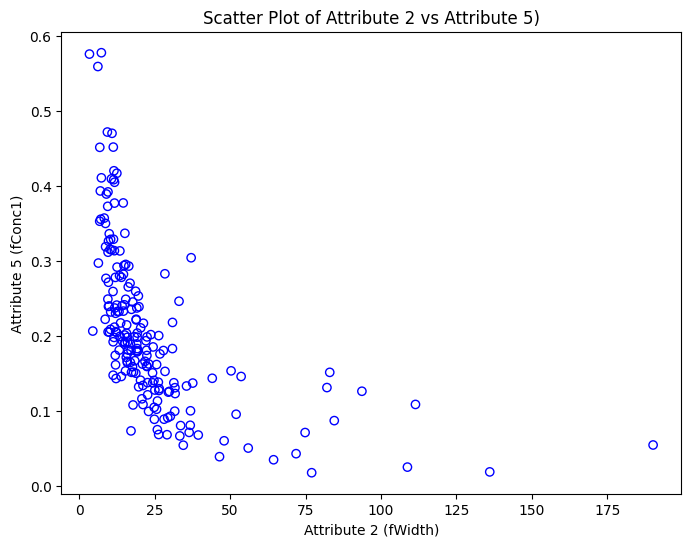

In [24]:
data2 = telescope_data["fWidth"]
data5 = telescope_data["fConc1"]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data2, data5, marker='o', color='b', facecolors = 'none', alpha=1)
plt.xlabel("Attribute 2 (fWidth)")
plt.ylabel("Attribute 5 (fConc1)")
plt.title("Scatter Plot of Attribute 2 vs Attribute 5)")
plt.show()